# Imports

In [107]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import math

## Código

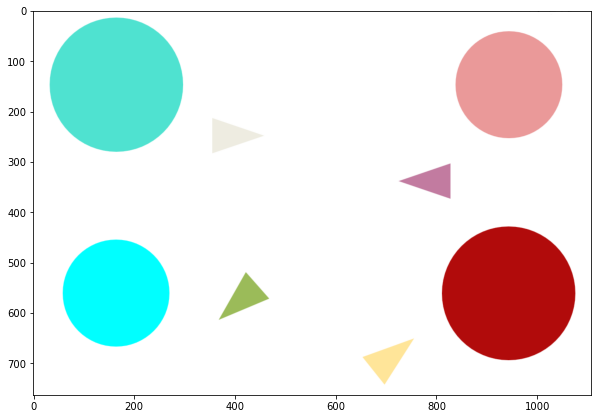

In [108]:
# imagem original
img = cv2.imread('circulo.png')

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize = (10,10))
plt.imshow(img_rgb)

# R1

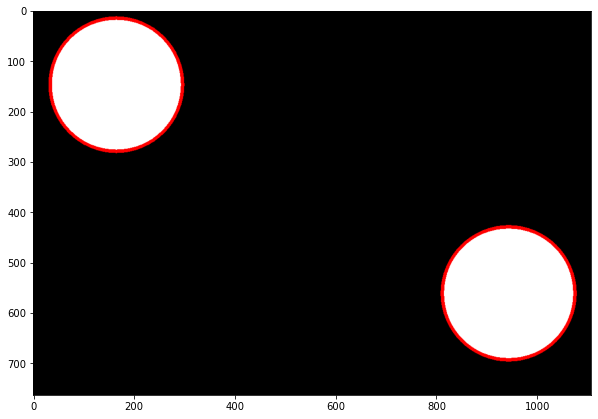

In [109]:
img = cv2.imread('circulo.png')

img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

image_lower_azul = np.array([0, 150, 100])  
image_upper_azul = np.array([250, 250, 245])


mask_hsv = cv2.inRange(img_hsv, image_lower_azul, image_upper_azul)

contornos, _ = cv2.findContours(mask_hsv, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 


mask_rgb = cv2.cvtColor(mask_hsv, cv2.COLOR_GRAY2RGB) 
contornos_img = mask_rgb.copy() # Cópia da máscara para ser desenhada "por cima"

cv2.drawContours(contornos_img, contornos, -1, [255, 0, 0], 5);

plt.figure(figsize = (10,10))  
plt.imshow(contornos_img);

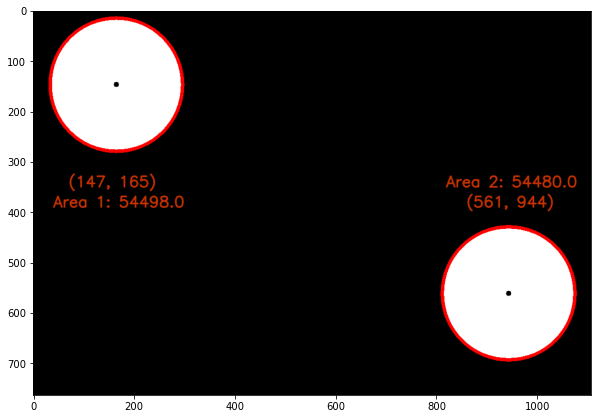

In [110]:
color = (0,0,0)
color2 = (156, 184, 255)

# Calculo das coordenadas do centro de massa1
cnt = contornos[0]
M = cv2.moments(cnt)

cx1 = int(M['m10']/M['m00'])
cy1 = int(M['m01']/M['m00'])
cv2.line(contornos_img,(cx1,cy1),(cx1,cy1),color,10)


# Calculo das coordenadas do centro de massa2
cnt2 = contornos[1]
M2 = cv2.moments(cnt2)

cx2 = int(M2['m10']/M2['m00'])
cy2 = int(M2['m01']/M2['m00'])
cv2.line(contornos_img,(cx2,cy2),(cx2,cy2),color,10)


# Calculo das Áreas
area1 = cv2.contourArea(cnt)
area2 = cv2.contourArea(cnt2)
# FONTE : https://docs.opencv.org/3.1.0/dd/d49/tutorial_py_contour_features.html


# Textos
font1 = cv2.FONT_HERSHEY_SIMPLEX
text1 = cy2 , cx2
origem1 = (70,350)
cv2.putText(contornos_img, str(text1), origem1, font1,1,(200,50,0),2,cv2.LINE_AA)

font2 = cv2.FONT_HERSHEY_SIMPLEX
text2 = cy1 , cx1
origem2 = (860,390)
cv2.putText(contornos_img, str(text2), origem2, font2,1,(200,50,0),2,cv2.LINE_AA)


# Textos das Áreas
font_area1 = cv2.FONT_HERSHEY_SIMPLEX
texto_area1 = "Area 1: {}".format(area1)
origem_area1 = (40,390)
cv2.putText(contornos_img, str(texto_area1), origem_area1, font_area1,1,(200,50,0),2,cv2.LINE_AA)

font_area2 = cv2.FONT_HERSHEY_SIMPLEX
texto_area2 = "Area 2: {}".format(area2)
origem_area2 = (820,350)
cv2.putText(contornos_img, str(texto_area2), origem_area2, font_area2,1,(200,50,0),2,cv2.LINE_AA)


# Retorno imagem e informações
plt.figure(figsize = (10,10))  
plt.imshow(contornos_img);

# R2

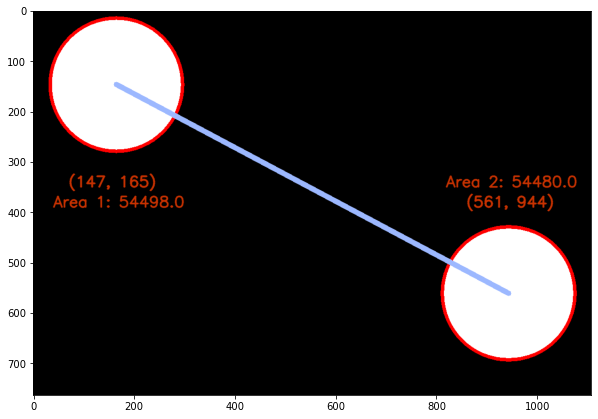

In [111]:
color = (0,0,0)
color2 = (156, 184, 255)

# Calculo das coordenadas do centro de massa1
cnt = contornos[0]
M = cv2.moments(cnt)

cx1 = int(M['m10']/M['m00'])
cy1 = int(M['m01']/M['m00'])


# Calculo das coordenadas do centro de massa2
cnt2 = contornos[1]
M2 = cv2.moments(cnt2)

cx2 = int(M2['m10']/M2['m00'])
cy2 = int(M2['m01']/M2['m00'])

# Textos
font1 = cv2.FONT_HERSHEY_SIMPLEX
text1 = cy2 , cx2
origem1 = (70,350)
cv2.putText(contornos_img, str(text1), origem1, font2,1,(200,50,0),2,cv2.LINE_AA)


font2 = cv2.FONT_HERSHEY_SIMPLEX
text2 = cy1 , cx1
origem2 = (860,390)
cv2.putText(contornos_img, str(text2), origem2, font2,1,(200,50,0),2,cv2.LINE_AA)


# Linha entre os pontos
linha = cv2.line(contornos_img,(cx1,cy1),(cx2,cy2),color2,10)


plt.figure(figsize = (10,10))  
plt.imshow(contornos_img)
#print(np.angle())

# Calculo do grau inclinação da reta

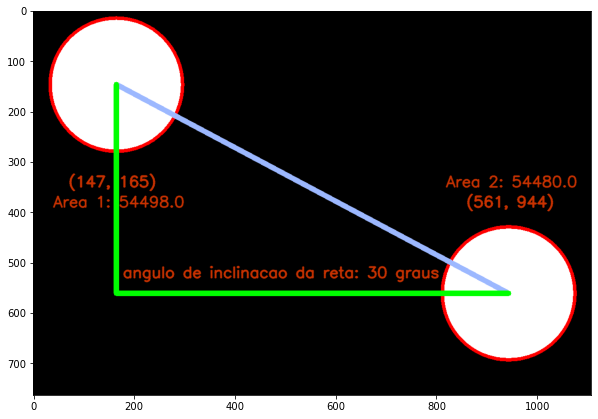

In [113]:
color = (0,0,0)
color2 = (156, 184, 255)
color3 = (0, 255, 0)

# Calculo das coordenadas do centro de massa1
cnt = contornos[0]
M = cv2.moments(cnt)

cx1 = int(M['m10']/M['m00'])
cy1 = int(M['m01']/M['m00'])


# Calculo das coordenadas do centro de massa2
cnt2 = contornos[1]
M2 = cv2.moments(cnt2)

cx2 = int(M2['m10']/M2['m00'])
cy2 = int(M2['m01']/M2['m00'])

# Textos
font1 = cv2.FONT_HERSHEY_SIMPLEX
text1 = cy2 , cx2
origem1 = (70,350)
cv2.putText(contornos_img, str(text1), origem1, font2,1,(200,50,0),2,cv2.LINE_AA)


font2 = cv2.FONT_HERSHEY_SIMPLEX
text2 = cy1 , cx1
origem2 = (860,390)
cv2.putText(contornos_img, str(text2), origem2, font2,1,(200,50,0),2,cv2.LINE_AA)


# Linha entre os pontos
linha = cv2.line(contornos_img,(cx1,cy1),(cx2,cy2),color2,10)


# Linhas a mais do para formar um triangulo triangulo
cv2.line(contornos_img,(cx1,cy1),(cx2,cy1),color3,10)
cv2.line(contornos_img,(cx2,cy2),(cx2,cy1),color3,10)


# CALCULO DA ANGULATURA
inclinacao = (cy2-cy1)/(cx2-cx1)
angulatura = round(math.degrees(inclinacao))


font3 = cv2.FONT_HERSHEY_SIMPLEX
text3 = "angulo de inclinacao da reta: {} graus".format(angulatura)
origem3 = (178,530)
cv2.putText(contornos_img, str(text3), origem3, font3,1,(200,50,0),2,cv2.LINE_AA)

plt.figure(figsize = (10,10))  
plt.imshow(contornos_img)
#print(np.angle())